<img src="https://images.pexels.com/photos/386009/pexels-photo-386009.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940">

# This notebook show how to do dimensionality reduction using  PCA on MNIST handwritten dataset.

- Will introduce some noise in the images
- Project data into new basis capturing maximum variations in the data(principle components)

Generally we use coefficients in selected PCA basis as new representation of data(dimensionality reduction).


As an application we will show PCA for denoising. I tried to convince in the class that even after adding Gaussian we can tell

- Different digit
- Digit width
- Digit orientation
- Writing style

hence looks like noise in not in the major directions of variation. This is just a heuristics.


If noise is in later principle components direction then we can  denoise the images by removing them((Dropping principle components capturing less variation in data)). Reconstruct data using only few principle components. 




In [1]:
# Need to have this cell magic to  ensure graphics as inline in the notebooks.
%matplotlib inline

<font size = 6 color="red">You may have to uncomment the code in the following cells if keras and tensorflow is not installed in your compuational environment(virtual environment or conda). </font>

In [2]:

#! pip install keras
#!pip install tensorflow

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

Using TensorFlow backend.


(60000, 28, 28)


**train Data is of shape (60000, 28, 28). It contains 60000 digits of shape 28X28. **
Data is loaded in **numpy  array object. It provides powerful multi dimensional array abstraction. 2d array provides matrix abstraction**. Checkout [numpy](http://www.numpy.org/) for quick numpy review.


In [5]:
matplotlib.rcParams['figure.figsize'] = (2, 2)

In [6]:
#digits = load_digits()
X = x_train

Y= y_train




In [7]:
x_train.shape

(60000, 28, 28)

Let's work only 10000 data points to avoid memory issue.

In [8]:
X = x_train[0:10000,:]
Y = y_train[0:10000]
n_samples = X.shape[0]
print(n_samples)

10000


Generally if your features are measured in different units(cm. km, light year etc) then standardizing them is a good practice.
Otherwise features measured in bigger units will dominate the variance.
Also search when to standardise the feature for more detail explanation.

**In this example we are not using StandardScaler. Each feature value is pixel intensity. Hence unit is not an issue here. I just kept it here to make sure you are aware of it. It is not the only way to standardize the data. To learn more read the sklearn documentation on standardizing data**

In [9]:
#std_scale = StandardScaler().fit(X)
#X = std_scale.transform(X)

# Let's plot some digits

# Let set the seed so than we can reproduce the results across multiple run of notebook

In [10]:
np.random.seed(1)

**Let's plot some random digits from the dataset by creating some random indexes**

In [11]:
samples_to_plot = 10
indexes = np.random.randint(0, high=n_samples, size= [samples_to_plot])

In [12]:
print(indexes)

[ 235 5192  905 7813 2895 5056  144 4225 7751 3462]


See below how to plot images using plt.imshow. 

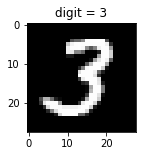

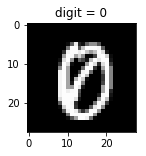

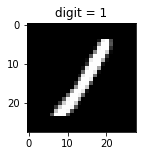

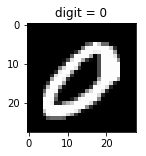

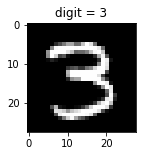

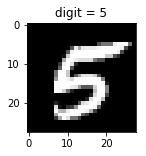

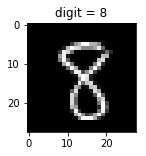

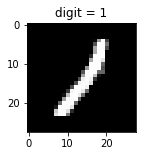

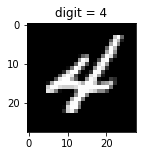

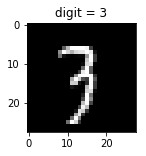

In [13]:
for idx in indexes:
    plt.imshow(X[idx,:],cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()

**Adding some Gaussian noise**

In [14]:
X_noisy = X + 60*np.random.randn(X.shape[0], X.shape[1], X.shape[2])


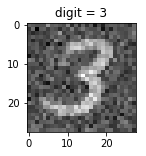

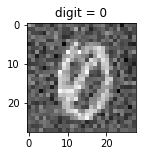

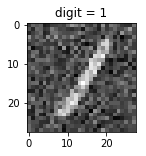

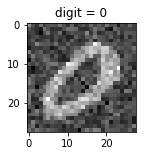

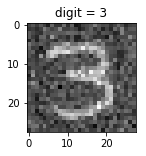

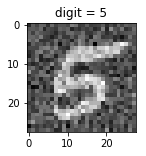

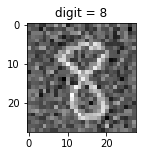

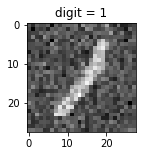

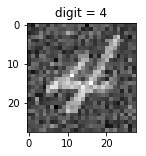

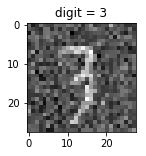

In [15]:
for idx in indexes:
    plt.imshow(X_noisy[idx,:],cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()

# We can still recognize the digits. Hence noise is not among the primary directions of variation
# Let's do PCA to get rid of noise, assuming noise  lies on lowest principle components direction.

Let's first centralize the data. I am using SVD. Will go over it in the next class.

# Vectorizing data.


We need to put each image as a row in the data matrix. After unrolling 28x28 matrix will be 784 dimensional vector.

In [16]:
X_noisy= X_noisy.reshape((X.shape[0], -1))
X_noisy.shape

(10000, 784)

In [28]:
#std_scale = StandardScaler().fit(X_noisy)
#X_noisy = std_scale.transform(X_noisy)

removing the mean

In [17]:
X_c = X_noisy - np.mean(X_noisy, axis=0)
print(X_c.shape)


(10000, 784)


we will use svd for doing PCA. We need to build covariance matrix but one can do svd also to find eigen value and eigen vector of covariance matrix.

You can read about svd in detail [here](http://www.cs.cornell.edu/courses/cs3220/2010sp/notes/svd.pdf) or read your linear algerba book for SVD.

In [18]:
# U, E, VT = svd(X), V contains eigen vector if [X_c]_T X_c(un scaled covariance matrix) and U contains eigen vector if X_c[X_c]^T. 
# Square root of eigen value is along the diagonal of matrix E
U, E, VT = np.linalg.svd(X_c, full_matrices=False)

In [45]:
U.shape, E.shape,VT.shape


((10000, 784), (784,), (784, 784))

# Let check if svd does matrix factorization or not. Multiplying U, E and VT together to see if it is same as X_c

In [20]:

X_c_recn = np.dot(U, np.diag(E))
X_c_recn.shape

(10000, 784)

In [21]:
X_c_recn = np.dot(X_c_recn, VT)
X_c_recn.shape

(10000, 784)

## Should get true on element wiser comparision

In [22]:
np.allclose(X_c, X_c_recn)

True

Hence column of V or row of VT are eigen vectors of $X_c^TX_c$= Unscaled covariance matrix

# Let's plot the variance explained
This will help you to decide how many components to keep

In [24]:
# Note eigen values are already sorted. This may not be the case in general with outer functions.
E**2

array([3.54489870e+09, 2.51439930e+09, 2.13933386e+09, 1.88898923e+09,
       1.67681574e+09, 1.55075902e+09, 1.16519733e+09, 1.04363825e+09,
       9.91316058e+08, 8.30236652e+08, 7.67704790e+08, 7.40184770e+08,
       6.18933530e+08, 6.09930862e+08, 5.93814518e+08, 5.64527384e+08,
       4.78998651e+08, 4.71798662e+08, 4.36264828e+08, 4.25097744e+08,
       3.92699314e+08, 3.83394590e+08, 3.65642668e+08, 3.57081229e+08,
       3.33562426e+08, 3.30106069e+08, 3.15102614e+08, 3.00764948e+08,
       2.88283672e+08, 2.74837189e+08, 2.60957280e+08, 2.55086291e+08,
       2.43700461e+08, 2.40146430e+08, 2.26923776e+08, 2.20139373e+08,
       2.15219638e+08, 2.02442692e+08, 2.02293736e+08, 2.01257797e+08,
       1.95735404e+08, 1.83186189e+08, 1.78988316e+08, 1.77567882e+08,
       1.68556530e+08, 1.63598957e+08, 1.61785651e+08, 1.57694593e+08,
       1.53604528e+08, 1.51405926e+08, 1.49838585e+08, 1.48482306e+08,
       1.41338037e+08, 1.39479558e+08, 1.33735795e+08, 1.32268115e+08,
      

In [25]:
E_cumsum = np.cumsum(E**2)
print(E_cumsum)


[3.54489870e+09 6.05929800e+09 8.19863186e+09 1.00876211e+10
 1.17644368e+10 1.33151958e+10 1.44803932e+10 1.55240314e+10
 1.65153475e+10 1.73455841e+10 1.81132889e+10 1.88534737e+10
 1.94724072e+10 2.00823381e+10 2.06761526e+10 2.12406800e+10
 2.17196786e+10 2.21914773e+10 2.26277421e+10 2.30528399e+10
 2.34455392e+10 2.38289338e+10 2.41945764e+10 2.45516577e+10
 2.48852201e+10 2.52153262e+10 2.55304288e+10 2.58311937e+10
 2.61194774e+10 2.63943146e+10 2.66552719e+10 2.69103582e+10
 2.71540586e+10 2.73942051e+10 2.76211288e+10 2.78412682e+10
 2.80564878e+10 2.82589305e+10 2.84612243e+10 2.86624821e+10
 2.88582175e+10 2.90414037e+10 2.92203920e+10 2.93979599e+10
 2.95665164e+10 2.97301153e+10 2.98919010e+10 3.00495956e+10
 3.02032001e+10 3.03546060e+10 3.05044446e+10 3.06529269e+10
 3.07942650e+10 3.09337445e+10 3.10674803e+10 3.11997484e+10
 3.13278470e+10 3.14550262e+10 3.15805790e+10 3.17035450e+10
 3.18233586e+10 3.19430723e+10 3.20607345e+10 3.21757951e+10
 3.22882257e+10 3.239921

# See how python supports negative indexing
# In cumulative sum last entry should be the total sum(measure of total variance)

In [27]:

E_cumsum[-1]

62505300703.54101

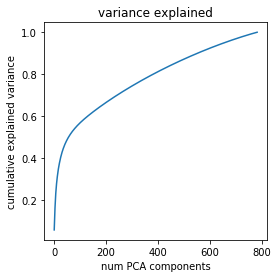

In [28]:
plt.figure(figsize=(4,4))
plt.plot(E_cumsum/E_cumsum[-1])
plt.title('variance explained')
plt.xlabel('num PCA components')
plt.ylabel('cumulative explained variance')
plt.show()

lets figure out 15% percentile

In [29]:
index_per = int(len(E_cumsum)*.15)
print(index_per)

117


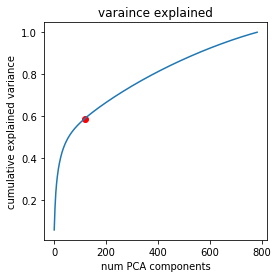

In [30]:
plt.figure(figsize=(4,4))

plt.plot(index_per, E_cumsum[index_per]/E_cumsum[-1], 'ro')
plt.plot(E_cumsum/E_cumsum[-1])
plt.title('varaince explained')
plt.xlabel('num PCA components')
plt.ylabel('cumulative explained variance')
plt.show()

looks  like using 117 component is also fine. There is almost linear change in variance after ~ 110 components.

Let's reconstruct

In [31]:
reduced_dim = index_per

In [32]:
# Let project into first 117 dimension
X_proj= np.dot(X_noisy, VT.T[:, :reduced_dim])

Each images has initially 784 dimension. After selecting only 117 PCA basis for projection, an image(784 dimensional initially) is represented by 117 coefficients in selected 117 PCA basis. We can use these 117 coefficients for further analysis.

In [33]:
# Let check the shape after projection.
print(X_proj.shape)

(10000, 117)


As an another application of PCA, we can reconstruct the images by projecting back. Multiply the 117 coefficients with their basis.

In [34]:
X_reconstructed = np.dot(X_proj,VT[:reduced_dim, :])

In [35]:
print(X_reconstructed.shape)

(10000, 784)


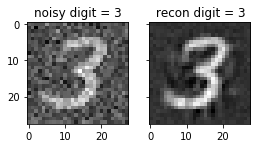

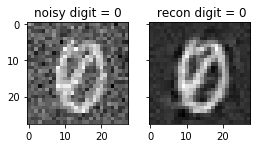

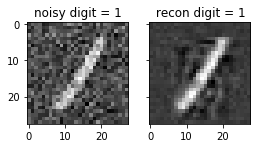

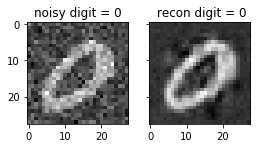

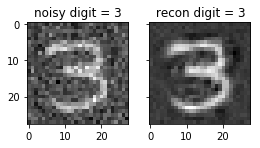

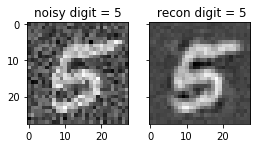

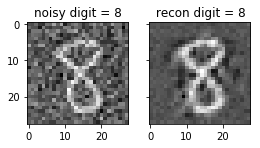

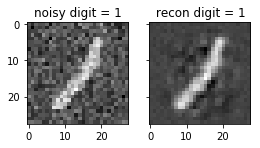

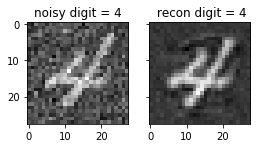

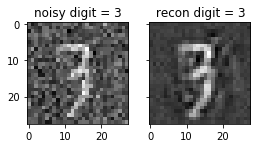

In [36]:
for idx in indexes:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (4,4))
    ax1.imshow(np.reshape(X_noisy[idx,:], (28,28)),cmap= 'gray' )
    ax1.set_title('noisy digit = {}'.format(str(Y[idx])))
    ax2.imshow(np.reshape(X_reconstructed[idx,:], (28,28)),cmap= 'gray' )
    ax2.set_title(' recon digit = {}'.format(str(Y[idx])))
    # Fine-tune figure; make subplots farther from each other.
    #f.subplots_adjust(hspace=6.0, wspace = 6.0)
    
    plt.show()

# Let's visualize  first two component in project PCA space for all the data.

Note that we didn't use label of images for doing PCA. Hence, tt is called <font color="red">unsupervised  dimensionality reduction </font> technique.

In [37]:
Y.shape

(10000,)

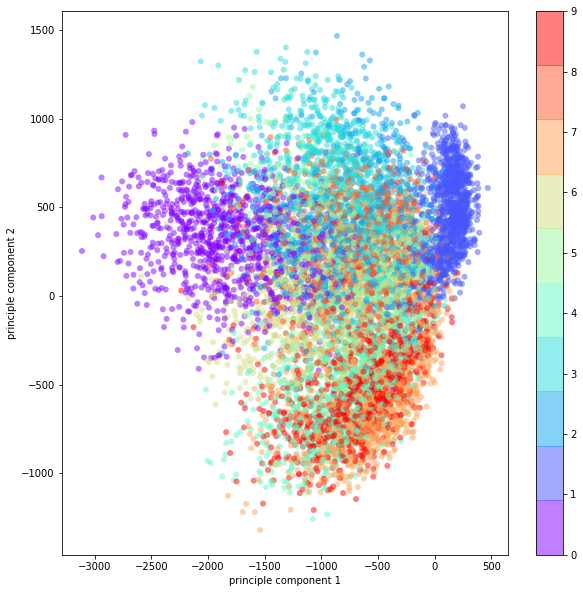

In [38]:
# We are using Y only for display purpose
plt.figure(figsize=(10,10))
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.colorbar();

# Let's use sklearn machine learning library to do the PCA

In [39]:
from sklearn.decomposition import  PCA
from sklearn import preprocessing
#std_scale = preprocessing.StandardScaler().fit(X)
#X_train_std = std_scale.transform(X)
pca = PCA(n_components=reduced_dim, svd_solver='full')
pca.fit(X_noisy)

PCA(copy=True, iterated_power='auto', n_components=117, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [40]:
X_pca= pca.fit_transform(X_noisy)

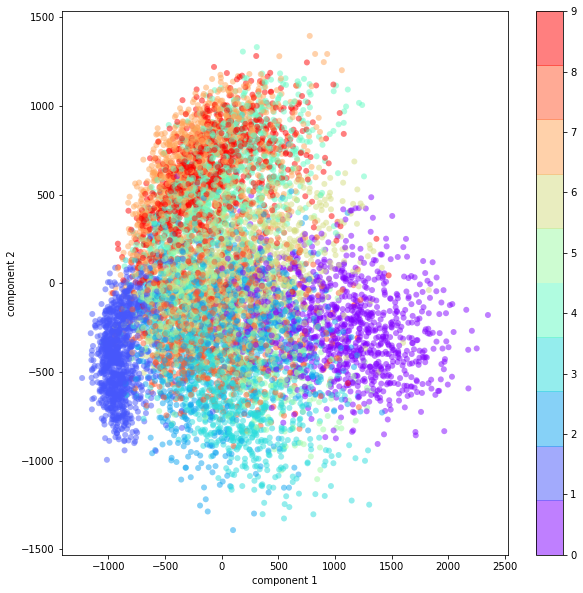

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


# Doing PCA using covariance matrix(other method)

One can build covariance matrix directly and calculate its eigen vectors to find principle components

# Q1(4=1+1+1+1 points)
1.  Build covariance matrix 
1.  Do eigen vector and value computation on covariance matrix.
1. Reconstruct data using only reduced_dim
1. plot the noisy and reconstructed images indexed by indexes array. See the code at the beginning of the notebook.

indexes contains some random integers build at the start of the notebook



Check is eigenvalues in the  order?

In [43]:
# Write code blocks  part 1 here



In [ ]:
# Write code blocks  part 2 here



In [ ]:
# Write code blocks  part 3 here



In [44]:
# Write code blocks  part 4 here



# Q2(1 point) Plot  first two components in the projected PCA space using scatter plot as done earlier.

It should match with svd  section plot

In [51]:
# write code block here


# Q3 (1 point) Plot the first 10 PCA basis, capturing the most variance as in image

In [73]:
# write code here



# Q4(.5 point)  plot basis as images in  the interval size of 50, i.e plot 1, 50, 100 ... etc. 

Note python indexing is 0 based.

In [74]:
# Write basis plotting loop here



# Q5(.5 point) what is you observation about  basis images after 150.

Double click this cell for typing the text.